## Шевцова Софья
группа 20930

15 вариант

Iris Setosa, Длина лепестка

In [1]:
# Шевцова Софья 15 вариант
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics
import scipy.stats
import math


def edf(sample):
    hist, edges = np.histogram(sample, bins=len(sample)) # вычисление гистограммы, hist - значения гистограммы edges - массив с границами каждой ячейки
    y = hist.cumsum() # кумулятивная сумма
    y = y/(len(sample))  # len(sample) = 50, количество длин лепестков
    for i in range(len(y)):
        plt.plot([edges[i], edges[i+1]], [y[i], y[i]], c="red") # построение графика
    plt.show()


df = pd.read_csv('iris.csv', sep=',')  # чтение файла
df = df.drop(df[df.name != 'Iris-setosa'].index) # выбираем необходимый вид ирисов
#2.1. 
print('2.1. Вычислить выборочные характеристики')
# находим необходимые характеристики с помощью библиотечных функций
mean = statistics.mean(df['petal_length'])
variance = statistics.pvariance(df['petal_length'])
unbiased_variance = statistics.variance(df['petal_length'], xbar=mean)
minim = df['petal_length'].min()
maxim = df['petal_length'].max()
median = statistics.median(df['petal_length'])
print("Выборочное среднее", mean)
print("Выборочная дисперсия", variance)          
print("Несмещенная выборочная дисперсия", unbiased_variance)          
print("Минимальная порядковая статистика", minim)          
print("Максимальная порядковая статистика", maxim)   
print("Размах", maxim - minim)        
print("Медиана", median)

2.1. Вычислить выборочные характеристики
Выборочное среднее 1.464
Выборочная дисперсия 0.029504
Несмещенная выборочная дисперсия 0.030106122448979592
Минимальная порядковая статистика 1.0
Максимальная порядковая статистика 1.9
Размах 0.8999999999999999
Медиана 1.5


Необходимые формулы для 2.1
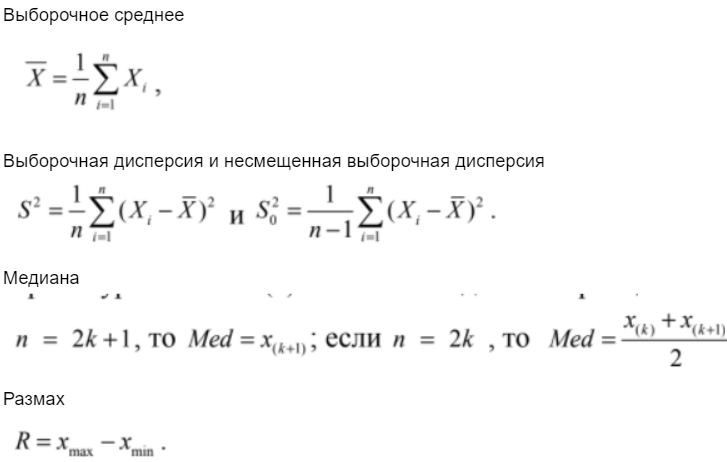

2.2 Построить
График эмпирической функции распределения


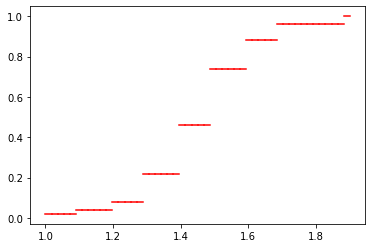

Гистограмма


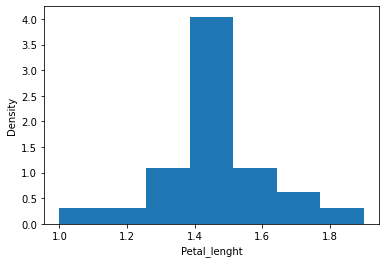

Ядерная оценка функции плотности


C:\Users\sofya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


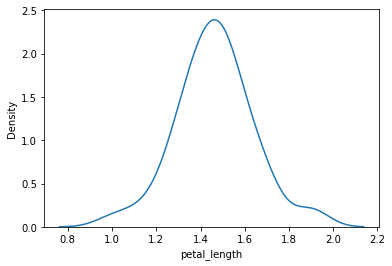

In [2]:
# 2.2 
print("2.2 Построить")
print("График эмпирической функции распределения")
sample = list(np.reshape(df['petal_length'].values, -1, order='F')) # список длин лепестков
edf(sample) # вызываем функцию

print("Гистограмма") # с помощью библиотечной функции строим гистограмму
plt.hist(df['petal_length'], bins = 7, density = True) # bins определили по формуле Стерджесса
plt.ylabel('Density')
plt.xlabel('Petal_lenght')
plt.show()

print("Ядерная оценка функции плотности")
sb.distplot(df['petal_length'], hist=False) # библиотечная функция, hist - гистограмма, без нее
plt.show()

Необходимые формулы для 2.2
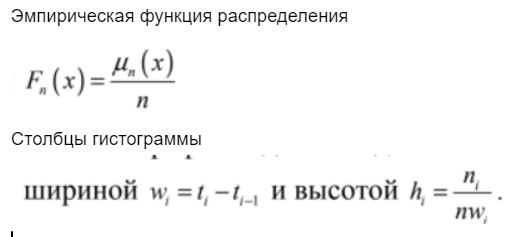

In [3]:
# 2.3
print('2.3. Построить 99% - доверительный интервал (в предположении, что выборка подчиняется нормальному распределению с неизвестными параметрами)')
t = 2.6799 # по таблице Стьюдента
interval = t * (math.sqrt(variance) / math.sqrt(df.shape[0] - 1))
print("для мат. ожидания: [", mean - interval, ";", mean + interval, "]")

epsilon = 0.01
q1 = scipy.stats.chi2.ppf(epsilon / 2, df.shape[0] - 1) # функция для нахождения чила из таблицы распредления Хи квадрат
q2 = scipy.stats.chi2.ppf(1 - epsilon / 2, df.shape[0] - 1)
int1 = (df.shape[0] * variance) / q2
int2 = (df.shape[0] * variance) / q1
print("для дисперсии: [", int1, ";", int2, "]")

2.3. Построить 99% - доверительный интервал (в предположении, что выборка подчиняется нормальному распределению с неизвестными параметрами)
для мат. ожидания: [ 1.3982401220656577 ; 1.5297598779343422 ]
для дисперсии: [ 0.018857045220213062 ; 0.05413707300800839 ]


In [10]:
print('2.4 Проверить гипотезу о нормальном законе распределения • по критерию Колмогорова или Хи-квадрат Пирсона')
print("Является ли нормальным распределение для 0.05?" )
def open_file(x):
    with open('iris.data') as f:
        strings = f.readlines()
        for raw in strings:
            if raw == "\n":
                strings.remove(raw)
                continue
            x.append(raw.split(","))
    return x

def is_normal_distribution(x, x_avg, var):
    def Dn():
        d_plus = 0
        for i, x_1 in enumerate(x):
            d_plus = max(d_plus, (i + 1) / len(x) - scipy.stats.norm(loc=x_avg, scale=var).cdf(x_1))

        d_minus = 0
        for i, x_1 in enumerate(x):
            d_minus = max(d_minus, scipy.stats.norm(loc=x_avg, scale=var).cdf(x_1) - i / len(x))
        print(d_minus, d_plus)
        return max(d_minus, d_plus)

    def Sk():
        return (6 * len(x) * Dn() + 1) / (6 * math.sqrt(len(x)))

    if Sk() <= 0.9042:
        return print("Да, т.к",Sk(),"<=" ,"0.9042" )
    else:
        return print("нет, т.к",Sk(),">" ,"0.9042" )
lines = []
open_file(lines)
setosa_petal_length = []
for i in lines:
        if i[4] == 'Iris-setosa\n':
            setosa_petal_length.append(float(i[2]))
setosa = setosa_petal_length.copy()
is_normal_distribution(setosa, mean, math.sqrt(variance))

2.4 Проверить гипотезу о нормальном законе распределения • по критерию Колмогорова или Хи-квадрат Пирсона
Является ли нормальным распределение для 0.05?
0.815271704127971 0.6901555656120137
0.815271704127971 0.6901555656120137
нет, т.к 5.788411731023561 > 0.9042


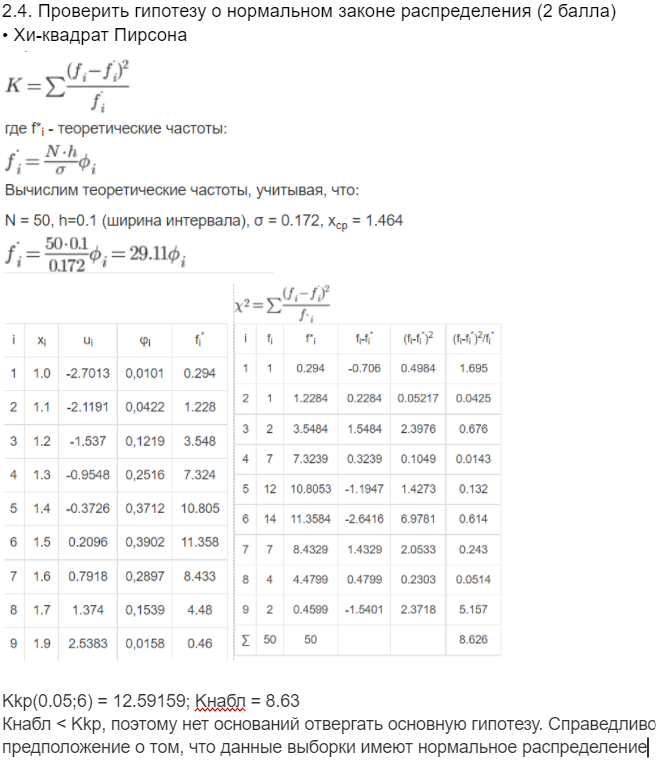